### UTFPR - Projeto Integrador Módulo 2.


### *Análise das matrículas da Educação Básica - Região Sudeste - 2018.*


    - Bruno Coutinho
#### Objetivo :

    - Analisar dados do Inep 
    - Fazer a limpeza, tratamento dos dados.
    - Usar o Mathplotlib para gerar gráficos que facilitem a visualização dos dados. 
    - Gerar insights sobre o número de matrículas em determinada região.
    - Apresentar as conclusões. 
    
##### [Arquivo utilizado para realizar o tratamento dos dados ](https://drive.google.com/drive/folders/1tOx-iQC_Nq88bu6vFz79Q_bQIhporKQu)

    https://download.inep.gov.br/microdados/microdados_educacao_basica_2018.zip
    https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar

In [69]:
# Carregando as bibliotecas do Pandas 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import psycopg2 as pg

In [70]:
# Carregando os datasets.

matricula = pd.read_csv('matriculas_sudeste_selected_single.csv')

municipio = pd.read_csv('municipios.csv')


In [71]:
matricula

,ID_ALUNO,ID_MATRICULA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ETAPA_ENSINO,ID_TURMA,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA
0,18EFF1A419044116AFDE243F9D0340AD,287391663,14,2,1,17.0,12515518,32080786,32,3202405,3,NaN
1,0094C605D9C51BAF6E31BC5182DAF4A1,287756875,5,1,1,2.0,12535813,32076215,32,3205309,3,NaN
2,DB588006528CFA20B014AFBD4868D9D5,287756915,4,1,1,1.0,12535822,32076215,32,3205309,3,NaN
3,BE6D828897248F019331228C7B2D0BDF,287756988,6,3,1,2.0,12535815,32076215,32,3205309,3,NaN
4,9D6254FD3595BB0B7DEAC15137EE1518,287756993,4,1,1,1.0,12535828,32076215,32,3205309,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20158048,02140E88A492B9705A7A07BF07C7DE27,279610098,11,1,1,18.0,11941011,31055719,31,3139904,3,NaN
20158049,B95A7B6FC6C878D889B7EA8EC2385C42,279784932,6,3,1,14.0,12101028,31251241,31,3104809,3,NaN
20158050,38A4E2D994B9618C5B7C7ACCAF310506,279867799,17,3,1,39.0,12054984,31105970,31,3144706,4,1.0
20158051,E8F2F1996ED7E4C0B334B9200BE10482,280029783,16,2,1,68.0,11959624,31359998,31,3118601,4,1.0


In [72]:
municipio

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [73]:
# Drop nas colunas que não utilizaremos.
matricula.drop(['ID_ALUNO','ID_TURMA','CO_ENTIDADE', 'TP_CATEGORIA_ESCOLA_PRIVADA'],axis=1)

,ID_MATRICULA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ETAPA_ENSINO,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
0,287391663,14,2,1,17.0,32,3202405,3
1,287756875,5,1,1,2.0,32,3205309,3
2,287756915,4,1,1,1.0,32,3205309,3
3,287756988,6,3,1,2.0,32,3205309,3
4,287756993,4,1,1,1.0,32,3205309,3
...,...,...,...,...,...,...,...,...
20158048,279610098,11,1,1,18.0,31,3139904,3
20158049,279784932,6,3,1,14.0,31,3104809,3
20158050,279867799,17,3,1,39.0,31,3144706,4
20158051,280029783,16,2,1,68.0,31,3118601,4


In [74]:
# Crindo um dicionário para a categoria Raça.

Dic_raca = {0:'Não declarada', 1:'Branca', 2:'Preta', 3 :'Parda', 4:'Amarela', 5:'Indígena'}

In [76]:
# Criando um dicionário para a categoria Etapa_ensino.

Dic_etapa_ensino = { 0 :'Etapa não informada',1 :'Educação Infantil - Creche', 2:'Educação Infantil - Pré-escola', 14:'Ensino Fundamental - 1º Ano',
                    15 :'Ensino Fundamental - 2º Ano', 16 :'Ensino Fundamental - 3º Ano', 17 :'Ensino Fundamental - 4º Ano',
                    18 :'Ensino Fundamental - 5º Ano', 19:'Ensino Fundamental - 6º Ano', 20 :'Ensino Fundamental - 7º Ano',
                    21 :'Ensino Fundamental - 8º Ano', 41 :'Ensino Fundamental - 9º Ano', 25 :'Ensino Médio - 1ª Série',
                    26 :'Ensino Médio - 2ª Série', 27 :'Ensino Médio - 3ª Série', 28 :'Ensino Médio - 4ª Série',
                    29 :'Ensino Médio - Não Seriada', 30 :'Curso Técnico Integrado 1ª Série',
                    31 :'Curso Técnico Integrado 2ª Série', 32 :'Curso Técnico Integrado 3ª Série',
                    33 :'Curso Técnico Integrado 4ª Série', 34 :'Curso Técnico Integrado Não Seriada',
                    39 :'Curso Técnico - Concomitante', 40 :'Curso Técnico - Subsequente', 68 :'Curso FIC Concomitante',
                    65 :'EJA - Ensino Fundamental - Projovem Urbano', 67 :'Curso FIC integrado - EJA  - Nível Médio',
                    69 :'EJA - Ensino Fundamental -  Anos iniciais', 70 :'EJA - Ensino Fundamental -  Anos finais',
                    71 :'EJA - Ensino Médio', 73 :'Curso FIC - EJA - Nível Fundamental',
                    74 :'Curso Técnico Integrado na Modalidade EJA'
                   }

In [77]:
Dic_nacionalidade = { 1 : 'Brasileira', 2 : 'Brasileira/Naturalizado', 3 : 'Estrangeira'}

In [78]:
Dic_uf = { 31 : 'Minas Gerais', 32 : 'Espírito Santo', 33 : 'Rio de Janeiro', 35 : 'São Paulo'}

In [79]:
Dic_dependencia = { 1 : 'Federal', 2 : 'Estadual', 3 : 'Municipal', 4 : 'Privada'}

In [80]:
# Criando coluna raça usando o dicionário.
Col_raça = matricula['TP_COR_RACA']
matricula['Raça'] = Col_raça.map(Dic_raca)

In [81]:
# Criando a coluna Etapa_ensino usando o dicionário.
Col_etapa_ensino = matricula['TP_ETAPA_ENSINO']
matricula['Etapa_Ensino'] = Col_etapa_ensino.map(Dic_etapa_ensino)

In [82]:
# Criando a coluna Nacionalidade usando o dicionário.
Col_nacionalidade = matricula['TP_NACIONALIDADE']
matricula['Nacionalidade'] = Col_nacionalidade.map(Dic_nacionalidade)

In [83]:
# Criando a coluna UF usando o dicionário.
Col_uf = matricula['CO_UF']
matricula['UF'] = Col_uf.map(Dic_uf)

In [84]:
# Criando a coluna UF usando o dicionário.
Col_dependencia = matricula['TP_DEPENDENCIA']
matricula['Dependência'] = Col_dependencia.map(Dic_dependencia)

In [85]:
# Agregando informações dos municípios em um úcico Dataset.
matricula_merge_mm = pd.merge(matricula, municipio, how='left', left_on=['CO_MUNICIPIO'], right_on=['codigo_ibge'])

In [86]:
matricula

,ID_ALUNO,ID_MATRICULA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ETAPA_ENSINO,ID_TURMA,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,Raça,Etapa_Ensino,Nacionalidade,UF,Dependência
0,18EFF1A419044116AFDE243F9D0340AD,287391663,14,2,1,17.0,12515518,32080786,32,3202405,3,NaN,Preta,Ensino Fundamental - 4º Ano,Brasileira,Espírito Santo,Municipal
1,0094C605D9C51BAF6E31BC5182DAF4A1,287756875,5,1,1,2.0,12535813,32076215,32,3205309,3,NaN,Branca,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal
2,DB588006528CFA20B014AFBD4868D9D5,287756915,4,1,1,1.0,12535822,32076215,32,3205309,3,NaN,Branca,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal
3,BE6D828897248F019331228C7B2D0BDF,287756988,6,3,1,2.0,12535815,32076215,32,3205309,3,NaN,Parda,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal
4,9D6254FD3595BB0B7DEAC15137EE1518,287756993,4,1,1,1.0,12535828,32076215,32,3205309,3,NaN,Branca,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20158048,02140E88A492B9705A7A07BF07C7DE27,279610098,11,1,1,18.0,11941011,31055719,31,3139904,3,NaN,Branca,Ensino Fundamental - 5º Ano,Brasileira,Minas Gerais,Municipal
20158049,B95A7B6FC6C878D889B7EA8EC2385C42,279784932,6,3,1,14.0,12101028,31251241,31,3104809,3,NaN,Parda,Ensino Fundamental - 1º Ano,Brasileira,Minas Gerais,Municipal
20158050,38A4E2D994B9618C5B7C7ACCAF310506,279867799,17,3,1,39.0,12054984,31105970,31,3144706,4,1.0,Parda,Curso Técnico - Concomitante,Brasileira,Minas Gerais,Privada
20158051,E8F2F1996ED7E4C0B334B9200BE10482,280029783,16,2,1,68.0,11959624,31359998,31,3118601,4,1.0,Preta,Curso FIC Concomitante,Brasileira,Minas Gerais,Privada


In [87]:
matricula_merge_mm

,ID_ALUNO,ID_MATRICULA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ETAPA_ENSINO,ID_TURMA,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,...,Etapa_Ensino,Nacionalidade,UF,Dependência,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,18EFF1A419044116AFDE243F9D0340AD,287391663,14,2,1,17.0,12515518,32080786,32,3202405,...,Ensino Fundamental - 4º Ano,Brasileira,Espírito Santo,Municipal,3202405,Guarapari,-20.6772,-40.5093,0,32
1,0094C605D9C51BAF6E31BC5182DAF4A1,287756875,5,1,1,2.0,12535813,32076215,32,3205309,...,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal,3205309,Vitória,-20.3155,-40.3128,1,32
2,DB588006528CFA20B014AFBD4868D9D5,287756915,4,1,1,1.0,12535822,32076215,32,3205309,...,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal,3205309,Vitória,-20.3155,-40.3128,1,32
3,BE6D828897248F019331228C7B2D0BDF,287756988,6,3,1,2.0,12535815,32076215,32,3205309,...,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal,3205309,Vitória,-20.3155,-40.3128,1,32
4,9D6254FD3595BB0B7DEAC15137EE1518,287756993,4,1,1,1.0,12535828,32076215,32,3205309,...,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal,3205309,Vitória,-20.3155,-40.3128,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20158048,02140E88A492B9705A7A07BF07C7DE27,279610098,11,1,1,18.0,11941011,31055719,31,3139904,...,Ensino Fundamental - 5º Ano,Brasileira,Minas Gerais,Municipal,3139904,Maria da Fé,-22.3044,-45.3773,0,31
20158049,B95A7B6FC6C878D889B7EA8EC2385C42,279784932,6,3,1,14.0,12101028,31251241,31,3104809,...,Ensino Fundamental - 1º Ano,Brasileira,Minas Gerais,Municipal,3104809,Augusto de Lima,-18.0997,-44.2655,0,31
20158050,38A4E2D994B9618C5B7C7ACCAF310506,279867799,17,3,1,39.0,12054984,31105970,31,3144706,...,Curso Técnico - Concomitante,Brasileira,Minas Gerais,Privada,3144706,Nova Era,-19.7577,-43.0333,0,31
20158051,E8F2F1996ED7E4C0B334B9200BE10482,280029783,16,2,1,68.0,11959624,31359998,31,3118601,...,Curso FIC Concomitante,Brasileira,Minas Gerais,Privada,3118601,Contagem,-19.9321,-44.0539,0,31


In [88]:

matricula_merge_mm.columns.values

array(['ID_ALUNO', 'ID_MATRICULA', 'NU_IDADE', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ETAPA_ENSINO', 'ID_TURMA', 'CO_ENTIDADE',
       'CO_UF', 'CO_MUNICIPIO', 'TP_DEPENDENCIA',
       'TP_CATEGORIA_ESCOLA_PRIVADA', 'Raça', 'Etapa_Ensino',
       'Nacionalidade', 'UF', 'Dependência', 'codigo_ibge', 'nome',
       'latitude', 'longitude', 'capital', 'codigo_uf'], dtype=object)

In [89]:
# Drop de colunas.

matricula_merge_mm.drop(['ID_ALUNO','ID_TURMA','TP_DEPENDENCIA','TP_COR_RACA','TP_ETAPA_ENSINO','CO_ENTIDADE','CO_UF','CO_MUNICIPIO','TP_NACIONALIDADE','TP_CATEGORIA_ESCOLA_PRIVADA','codigo_ibge','codigo_uf'],
                        inplace = True, axis=1)


In [90]:
matricula_merge_mm.columns.values

array(['ID_MATRICULA', 'NU_IDADE', 'Raça', 'Etapa_Ensino',
       'Nacionalidade', 'UF', 'Dependência', 'nome', 'latitude',
       'longitude', 'capital'], dtype=object)

In [91]:
matricula_merge_mm.rename(columns={'nome': 'Município'}, inplace = True)

In [92]:
matricula_merge_mm.columns.values

array(['ID_MATRICULA', 'NU_IDADE', 'Raça', 'Etapa_Ensino',
       'Nacionalidade', 'UF', 'Dependência', 'Município', 'latitude',
       'longitude', 'capital'], dtype=object)

In [24]:
# Transformando o Dataset em um Arquivo .csv.

matricula_merge_mm.to_csv("matriculas_sudeste_final_6.csv", encoding = "utf-8", index = False)

In [93]:
matricula_merge_mm

,ID_MATRICULA,NU_IDADE,Raça,Etapa_Ensino,Nacionalidade,UF,Dependência,Município,latitude,longitude,capital
0,287391663,14,Preta,Ensino Fundamental - 4º Ano,Brasileira,Espírito Santo,Municipal,Guarapari,-20.6772,-40.5093,0
1,287756875,5,Branca,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal,Vitória,-20.3155,-40.3128,1
2,287756915,4,Branca,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal,Vitória,-20.3155,-40.3128,1
3,287756988,6,Parda,Educação Infantil - Pré-escola,Brasileira,Espírito Santo,Municipal,Vitória,-20.3155,-40.3128,1
4,287756993,4,Branca,Educação Infantil - Creche,Brasileira,Espírito Santo,Municipal,Vitória,-20.3155,-40.3128,1
...,...,...,...,...,...,...,...,...,...,...,...
20158048,279610098,11,Branca,Ensino Fundamental - 5º Ano,Brasileira,Minas Gerais,Municipal,Maria da Fé,-22.3044,-45.3773,0
20158049,279784932,6,Parda,Ensino Fundamental - 1º Ano,Brasileira,Minas Gerais,Municipal,Augusto de Lima,-18.0997,-44.2655,0
20158050,279867799,17,Parda,Curso Técnico - Concomitante,Brasileira,Minas Gerais,Privada,Nova Era,-19.7577,-43.0333,0
20158051,280029783,16,Preta,Curso FIC Concomitante,Brasileira,Minas Gerais,Privada,Contagem,-19.9321,-44.0539,0


In [94]:
mat_01 = matricula_merge_mm

In [95]:
# Agrupando e contando o total de matrículas por UF.
df_uf = mat_01.groupby('UF').ID_MATRICULA.count()

In [96]:
# Converter df_uf para data frame.
df_uf_1 = df_uf.to_frame

<AxesSubplot:xlabel='UF'>

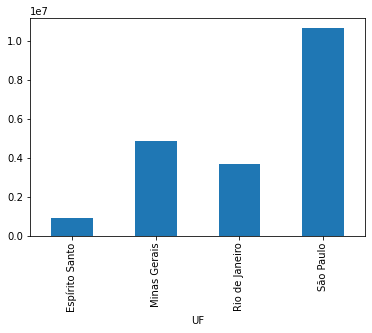

In [97]:
df_uf.plot.bar(x='UF', y='ID_MATRICULA')


In [98]:
df_1 = pd.DataFrame(df_uf)

In [99]:
df_1

,ID_MATRICULA
UF,
Espírito Santo,912733
Minas Gerais,4882255
Rio de Janeiro,3705662
São Paulo,10657403


In [100]:
# Agrupando por UF, dependência, Raça.
dfx = mat_01.groupby(['UF','Dependência','Raça']).ID_MATRICULA.count()

In [101]:
dfx

UF              Dependência  Raça         
Espírito Santo  Estadual     Amarela              924
                             Branca             62888
                             Indígena             473
                             Não declarada      26092
                             Parda             149638
                                               ...   
São Paulo       Privada      Branca           1381848
                             Indígena            1384
                             Não declarada     732729
                             Parda             194531
                             Preta              36135
Name: ID_MATRICULA, Length: 96, dtype: int64

In [102]:
# Convertendo Series para Dataframe.
df_uf_dep = dfx.to_frame()

In [103]:
df_uf_dep

ID_MATRICULA
UF             Dependência Raça                       
Espírito Santo Estadual    Amarela                 924
                           Branca                62888
                           Indígena                473
                           Não declarada         26092
                           Parda                149638
...                                                ...
São Paulo      Privada     Branca              1381848
                           Indígena               1384
                           Não declarada        732729
                           Parda                194531
                           Preta                 36135

[96 rows x 1 columns]

In [35]:
# Usando a função unstack pois queremos que o index vire nível da coluna, fazendo com que UF agrupado seja nosso novo index.
df_plot = df_uf_dep.unstack().unstack()

In [36]:
# ID_MATRICULA ficou com o nível mais alto, então faremos um drop para que nosso dataframe fique com apenas dois níveis. 
df_plot2 = df_plot.droplevel(0, axis=1) 

In [37]:
# Agora podemos plotar os gráficos.Temos Raça e Dependência com nivel e subnivel.
df_plot2.head()

Raça            Amarela                             Branca                    \
Dependência    Estadual Federal Municipal Privada Estadual Federal Municipal   
UF                                                                             
Espírito Santo      924     121      1330     400    62888    5185    153970   
Minas Gerais       4198     792      5476    2865   660041   23182    652447   
Rio de Janeiro     1283     125      3212    3272   134469   15241    506604   
São Paulo         13053     191     10377   19114  1959980    9717   2178659   

Raça                    Indígena          ... Não declarada            Parda  \
Dependência     Privada Estadual Federal  ...     Municipal Privada Estadual   
UF                                        ...                                  
Espírito Santo    53514      473      28  ...         63103   22555   149638   
Minas Gerais     350777     7061     199  ...        291466  168411  1081253   
Rio de Janeiro   404985      568      32  ...        443576  455569   212380   
São Paulo       1381848     7380      33  ...       1021991  732729   966739   

Raça                                        Preta                            
Dependência    Federal Municipal Privada Estadual Federal Municipal Privada  
UF                                                                           
Espírito Santo    5150    285450   34392    14385     584     26022    2638  
Minas Gerais     18927    874034  165008   137637    3050    115569   23000  
Rio de Janeiro    8204    694636  201700    63202    2178    158734   41604  
São Paulo         3335    962596  194531   132374     636    125019   36135  

[4 rows x 24 columns]

Text(0, 0.5, 'Matrículas')

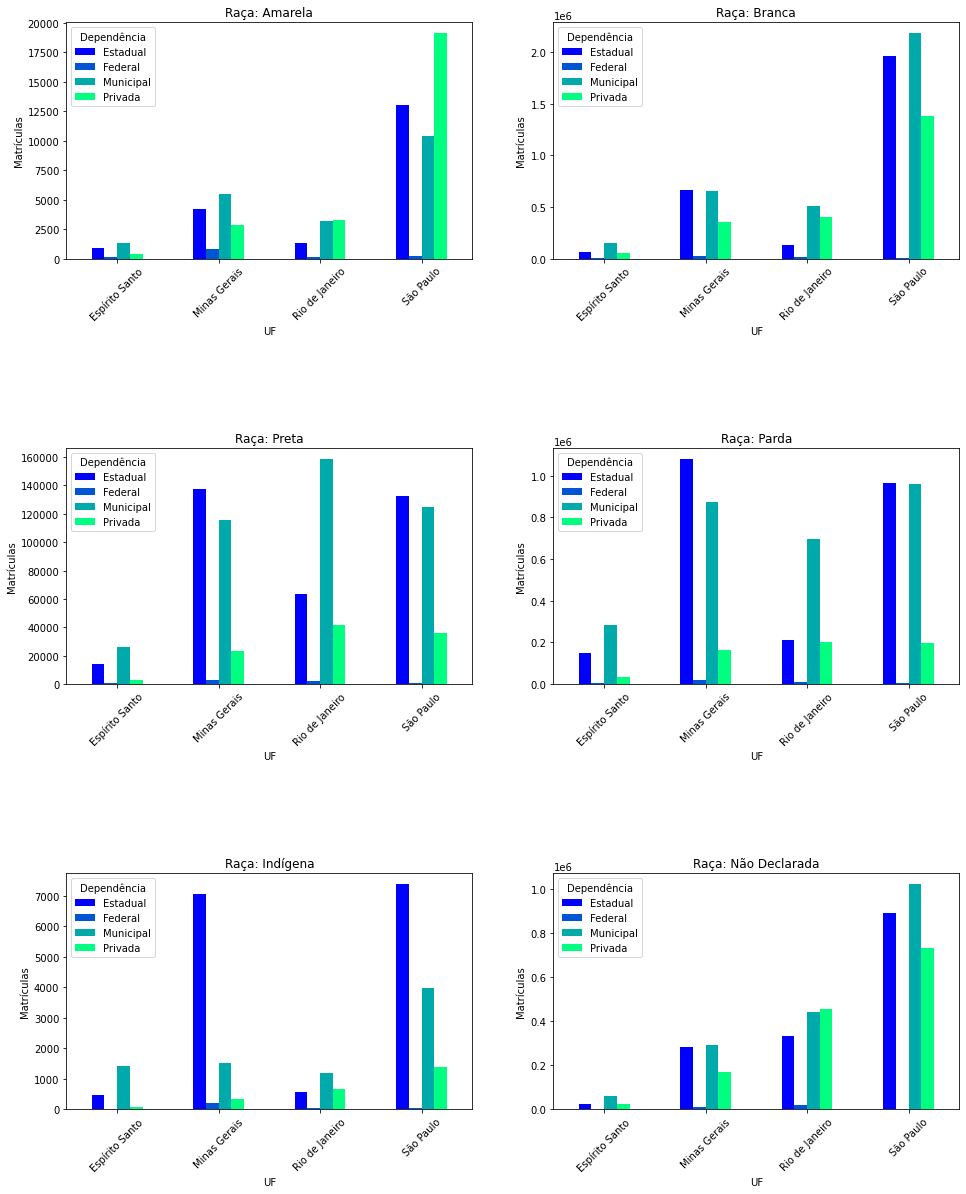

In [38]:
# Plotando o Gráfico de barras do Número de (matrículas x dependencia) de cada estado separado por raça.
fig , ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 20))
plt.subplots_adjust( hspace=0.8)
df_plot2['Amarela'].plot.bar(colormap='winter', ax=ax1)
df_plot2['Branca'].plot.bar(colormap='winter', ax=ax2)
df_plot2['Preta'].plot.bar(colormap='winter', ax=ax3)
df_plot2['Parda'].plot.bar(colormap='winter', ax=ax4)
df_plot2['Indígena'].plot.bar(colormap='winter', ax=ax5)
df_plot2['Não declarada'].plot.bar(colormap='winter', ax=ax6)


ax1.set_title('Raça: Amarela')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel('Matrículas')
ax2.set_title('Raça: Branca')
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_ylabel('Matrículas')
ax3.set_title('Raça: Preta')
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_ylabel('Matrículas')
ax4.set_title('Raça: Parda')
ax4.tick_params(axis='x', labelrotation=45)
ax4.set_ylabel('Matrículas')
ax5.set_title('Raça: Indígena')
ax5.tick_params(axis='x', labelrotation=45)
ax5.set_ylabel('Matrículas')
ax6.set_title('Raça: Não Declarada')
ax6.tick_params(axis='x', labelrotation=45)
ax6.set_ylabel('Matrículas')

In [55]:
# Atribuindo o dataframe para o gráfico de linhas.
df_linhas = matricula_merge_mm

In [56]:
# Preparando o Dataframe para gráfico de Linhas, dropando as Na's.
#df_linhas = df_1.dropna()

In [57]:
# Separando dor Estado.
df_SP_ETAPA = df_linhas[df_linhas['UF'] == 'São Paulo']
df_MG_ETAPA = df_linhas[df_linhas['UF'] == 'Minas Gerais']
df_RJ_ETAPA = df_linhas[df_linhas['UF'] == 'Rio de Janeiro']
df_ES_ETAPA = df_linhas[df_linhas['UF'] == 'Espírito Santo']

In [58]:
# Contando as matrícula por etapa de ensino.
df_SP_ETAPA1 = df_SP_ETAPA.groupby(['Etapa_Ensino']).ID_MATRICULA.count()
df_MG_ETAPA1 = df_MG_ETAPA.groupby(['Etapa_Ensino']).ID_MATRICULA.count()
df_RJ_ETAPA1 = df_RJ_ETAPA.groupby(['Etapa_Ensino']).ID_MATRICULA.count()
df_ES_ETAPA1 = df_ES_ETAPA.groupby(['Etapa_Ensino']).ID_MATRICULA.count()

In [59]:
# Transformando em Frame.

df_SP_ETAPA2 = df_SP_ETAPA1.to_frame() 
df_MG_ETAPA2 = df_MG_ETAPA1.to_frame()  
df_RJ_ETAPA2 = df_RJ_ETAPA1.to_frame()  
df_ES_ETAPA2 = df_ES_ETAPA1.to_frame() 

In [60]:
# Dropando linhas que contêm etapas não relevantes para o estudo.

df_SP_ETAPA3 = df_SP_ETAPA2.drop(['Curso FIC - EJA - Nível Fundamental','Curso FIC Concomitante','Curso Técnico Integrado 4ª Série','Curso Técnico Integrado Não Seriada','Curso Técnico Integrado na Modalidade EJA','Ensino Médio - 4ª Série','Ensino Médio - Não Seriada'])
df_MG_ETAPA3 = df_MG_ETAPA2.drop(['Curso FIC - EJA - Nível Fundamental','Curso FIC Concomitante','Curso Técnico Integrado 4ª Série','Curso Técnico Integrado Não Seriada','Curso Técnico Integrado na Modalidade EJA','Ensino Médio - Não Seriada'])
df_RJ_ETAPA3 = df_RJ_ETAPA2.drop(['Curso FIC - EJA - Nível Fundamental','Curso FIC Concomitante','Curso Técnico Integrado 4ª Série','Curso Técnico Integrado Não Seriada','Curso Técnico Integrado na Modalidade EJA','Ensino Médio - 4ª Série','Ensino Médio - Não Seriada'])
df_ES_ETAPA3 = df_ES_ETAPA2.drop(['Curso Técnico Integrado 4ª Série','Curso Técnico Integrado Não Seriada','Curso Técnico Integrado na Modalidade EJA','Ensino Médio - 4ª Série'])



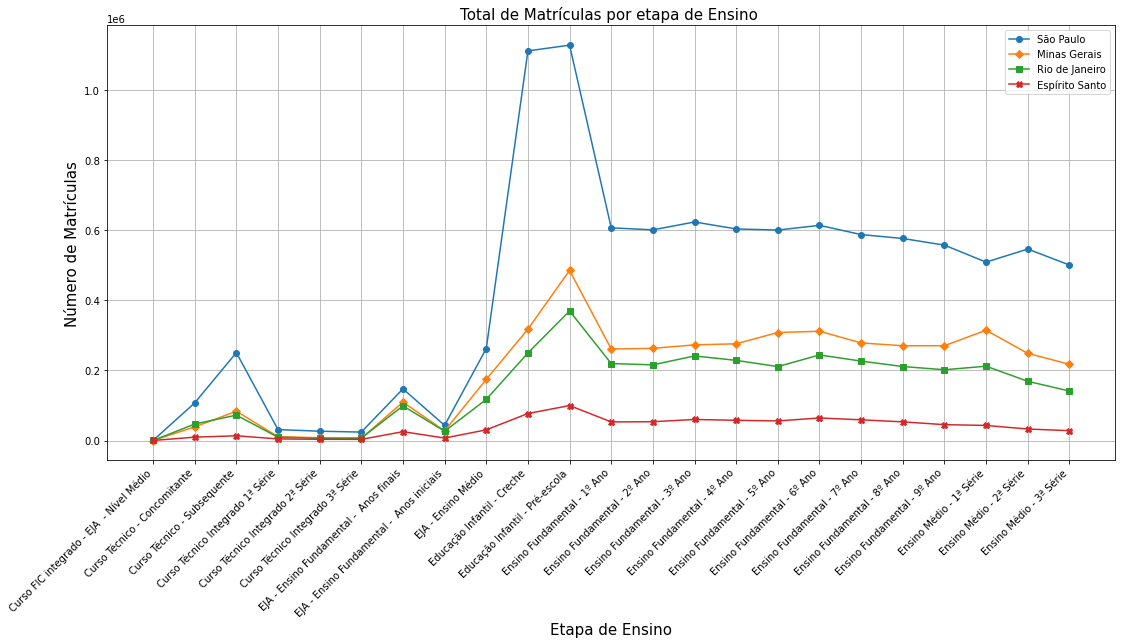

In [61]:
# Plotando o Gráfico de linhas.

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
ax1.plot(df_SP_ETAPA3, label='São Paulo' , marker = "o")
ax1.plot(df_MG_ETAPA3, label='Minas Gerais' , marker = "D")
ax1.plot(df_RJ_ETAPA3, label='Rio de Janeiro' , marker = "s")
ax1.plot(df_ES_ETAPA3, label='Espírito Santo' , marker = "X")
ax1.legend()
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=None, hspace=1)


plt.xlabel('Etapa de Ensino', size = 15, color="black")
plt.ylabel('Número de Matrículas',size = 15, color="black")
plt.title('Total de Matrículas por etapa de Ensino ', size = 15, color="black")
plt.grid()
plt.show()

In [62]:
df_SP_ETAPA.head()

,ID_MATRICULA,NU_IDADE,Raça,Etapa_Ensino,Nacionalidade,UF,Dependência,Município,latitude,longitude,capital
912733,318216431,11,Parda,Ensino Fundamental - 5º Ano,Brasileira,São Paulo,Municipal,Itapevi,-23.5488,-46.9327,0
912734,318216451,10,Branca,Ensino Fundamental - 5º Ano,Brasileira,São Paulo,Municipal,Itapevi,-23.5488,-46.9327,0
912735,318216780,11,Branca,Ensino Fundamental - 5º Ano,Brasileira,São Paulo,Municipal,Itapevi,-23.5488,-46.9327,0
912736,318030309,14,Parda,Ensino Fundamental - 8º Ano,Brasileira,São Paulo,Estadual,Embu das Artes,-23.6437,-46.8579,0
912737,318030349,14,Branca,Ensino Fundamental - 8º Ano,Brasileira,São Paulo,Estadual,Embu das Artes,-23.6437,-46.8579,0


In [63]:
df_SP_Idade_ = df_SP_ETAPA[df_SP_ETAPA['NU_IDADE'] >= 19]

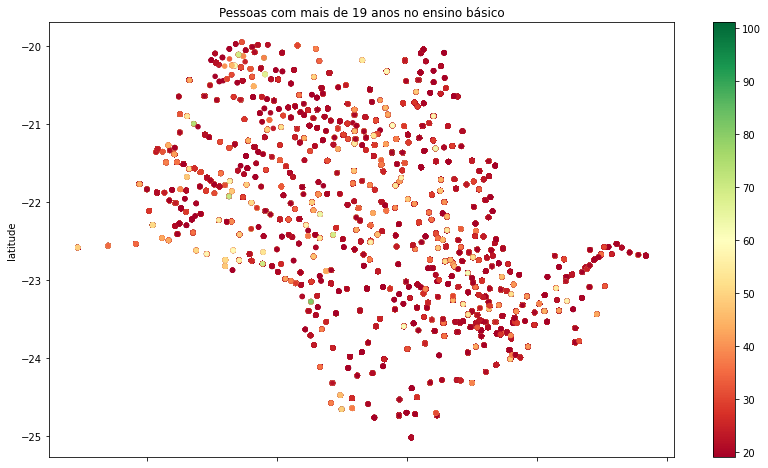

In [67]:
df_SP_ETAPA19_ = df_SP_Idade_.plot.scatter(y='latitude', x= 'longitude', 
                                          c= df_SP_Idade_['NU_IDADE'],   
                                            cmap='RdYlGn',
                                            figsize= (14,8), title='Pessoas com mais de 19 anos no ensino básico')

## `Conclusões:`

* Analisando o `Gráfico 1 ` pode-se verificar que o estado com o maior número de matrículas é SP, seguido por MG, RJ e ES.


* Pelo `Conjuto de gráficos de barras` a maior parte das matrículas estão concentradas nas dependências Municipais e Estaduais independente do Estado ou Raça, podemos destacar que o Estado do Rio de Janeiro possuí a maior quantidade de negros declarados e se encontram em maioria nas dependências Municipais, enquanto o estado de São Paulo concentra a maioria das matrículas de raça branca declarada e concentrada em escolas Estaduais e Municipais e também lidera a quantidade de matrículas para indivíduos que declaram ter raça Parda e também se concetram em escolas Estaduais e Municipais, vale ressaltar que há uma grande quantidade de alunos que não declaram a raça. 


* Olhando para o`Gráfico de Linhas ` podemos afirmar que a etapa de ensino que recebe a maior parte das matrículas é a Educação Infantil - Pré Escola, logo em seguinda conseguimos notar uma grande queda na quantidade para a próxima etapa que é Ensino Fundamental - 1° Ano, depois disso a maioria dos estados segue uma média constante até os últimos anos do Ensino Fundamental, no Ensino Médio é possível evidenciar a queda do número de matrículas em todos os estados evidenciando que é comum uma grande desistência por parte dos alunos antes do fim da vida escolar básica.


* Através do `Gráfico de Disperssão do Estado de São Paulo ` é possível concluir que longe dos grandes centros como a Região Metropolitana de São Paulo , e  a Região de Ribeirão Preto onde se concentra a maior parte dos alunos com mais de 19 anos que estão cursando o Ensino Básico.